<a href="https://colab.research.google.com/github/indrabna/PA_DM/blob/main/Data_Mining_Final_Project_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM (Supervised Learning)
Bank Data Set

## Business Understanding

Dataset Bank Data Set Using Decision Tree dapat memberikan pemahaman bisnis kepada bank atau lembaga keuangan mengenai profil klien yang membutuhkan pinjaman pribadi dan faktor apa yang berpengaruh dalam pengambilan keputusan klien untuk mengambil pinjaman pribadi.

Data usia, pengalaman kerja, penghasilan, rata-rata pengeluaran kartu kredit, pendidikan, jumlah anggota keluarga, jumlah pinjaman hipotek, dan kode pos dapat digunakan sebagai variabel input untuk memprediksi apakah seseorang akan mengambil pinjaman pribadi atau tidak.

Dengan memahami profil klien yang berpotensi mengambil pinjaman pribadi, bank atau lembaga keuangan dapat memperluas pasar produk dan meningkatkan keuntungan. Selain itu, pemahaman faktor apa yang berpengaruh dalam pengambilan keputusan klien juga dapat membantu bank atau lembaga keuangan dalam merancang kampanye pemasaran yang lebih efektif untuk produk pinjaman pribadi.

## Data Understanding

### Collect Data

In [1]:
# Import pustaka Seaborn dan beri alias sns
import seaborn as sns
# Import modul pyplot dari pustaka Matplotlib dan beri alias plt
import matplotlib.pyplot as plt 
# Import pustaka Pandas dan beri alias pd
import pandas as pd 
# Import pustaka NumPy dan beri alias np
import numpy as np

In [2]:
# Menggunakan pustaka Pandas untuk membaca file CSV dari URL
df = pd.read_csv("https://raw.githubusercontent.com/indrabna/PA_DM/main/bank.csv")
# Menampilkan isi dari dataframe df
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### Describe Data

In [3]:
# Menampilkan teks "Informasi Dataset:"
print("Informasi Dataset:")
# Menampilkan informasi mengenai dataset menggunakan metode info() pada dataframe df
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
# Menampilkan ringkasan statistik deskriptif dari dataset menggunakan metode describe() pada dataframe df
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Data Preparation

### Selected Data

In [5]:
# Menggunakan operasi indexing pada dataframe df untuk memilih kolom 'age', 'job', dan 'education'
selected_data = df[["age", "job", "education"]]
# Menampilkan 5 baris pertama dari dataframe selected_data menggunakan metode head()
print(selected_data.head())

   age         job  education
0   59      admin.  secondary
1   56      admin.  secondary
2   41  technician  secondary
3   55    services  secondary
4   54      admin.   tertiary


### Missing Value

In [6]:
# Menggunakan metode isna() untuk mengidentifikasi nilai-nilai null atau missing dalam dataframe df
# Kemudian menggunakan metode sum() untuk menghitung jumlah nilai null atau missing dalam setiap kolom
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# Menggunakan metode drop() pada dataframe df untuk menghapus kolom 'default'
df.drop(columns=
        ["default","contact","poutcome"])

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,733,no,no,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,29,no,no,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,0,no,yes,8,may,9,2,172,5,no


### Visualisasi


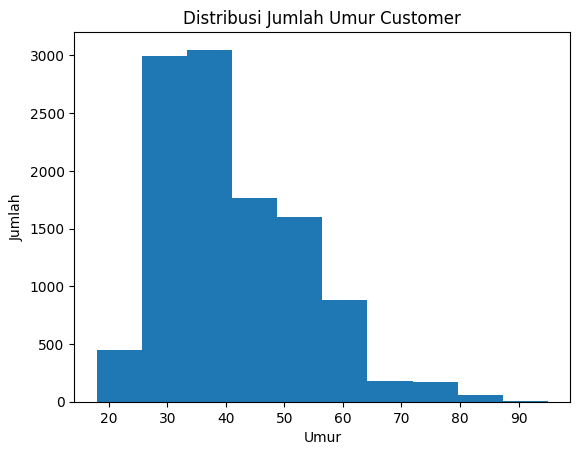

In [8]:
plt.hist(df['age'], bins=10)
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.title('Distribusi Jumlah Umur Customer')
plt.show()

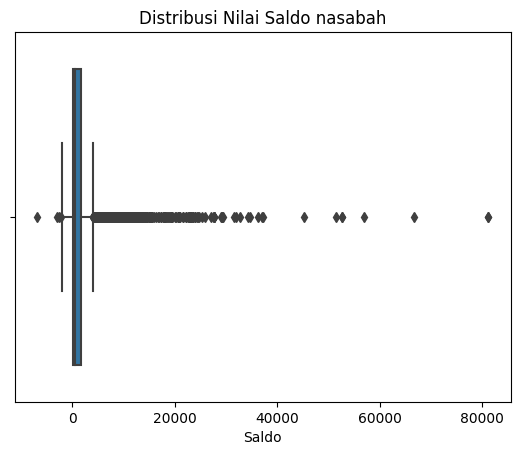

In [9]:
sns.boxplot(x=df['balance'])
plt.xlabel('Saldo')
plt.title('Distribusi Nilai Saldo nasabah')
plt.show()

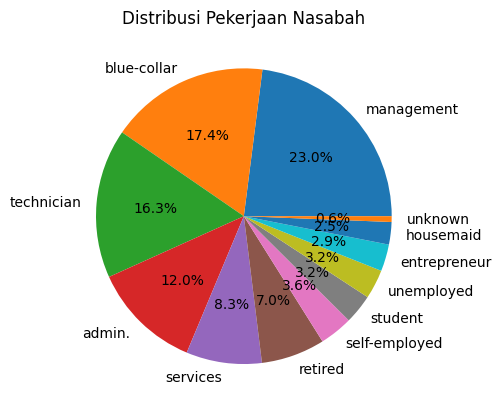

In [10]:
job_count = df['job'].value_counts()
plt.pie(job_count, labels=job_count.index, autopct='%1.1f%%')
plt.title('Distribusi Pekerjaan Nasabah')
plt.show()

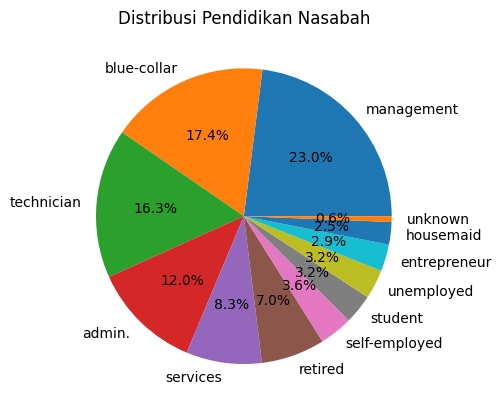

In [11]:
edu_count = df['education'].value_counts()
plt.pie(job_count, labels=job_count.index, autopct='%1.1f%%')
plt.title('Distribusi Pendidikan Nasabah')
plt.show()

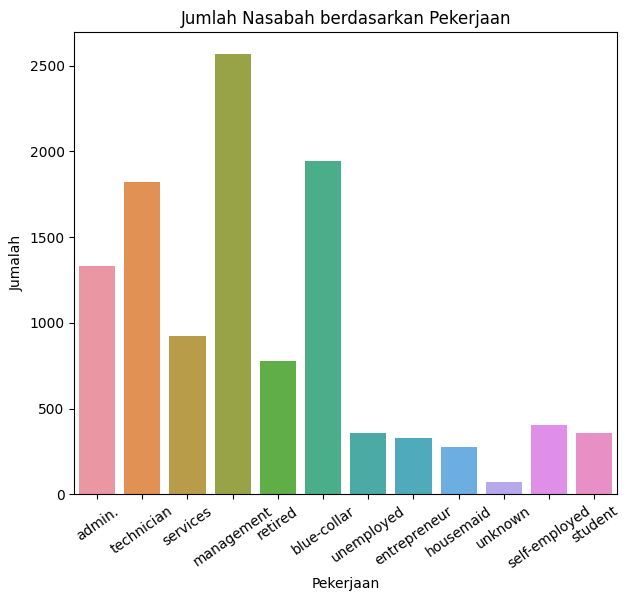

In [12]:
plt.figure(figsize=(7,6))
sns.countplot(x=df['job'])
plt.xticks(rotation=35)
plt.xlabel('Pekerjaan')
plt.ylabel('Jumalah')
plt.title('Jumlah Nasabah berdasarkan Pekerjaan')
plt.show()

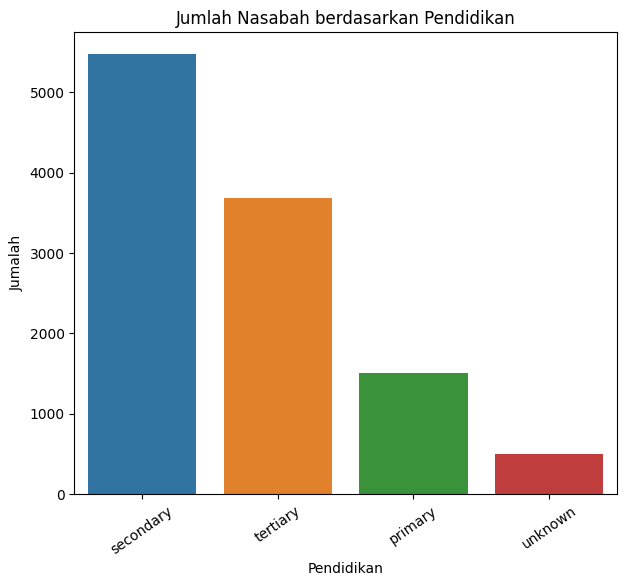

In [13]:
plt.figure(figsize=(7,6))
sns.countplot(x=df['education'])
plt.xticks(rotation=35)
plt.xlabel('Pendidikan')
plt.ylabel('Jumalah')
plt.title('Jumlah Nasabah berdasarkan Pendidikan')
plt.show()

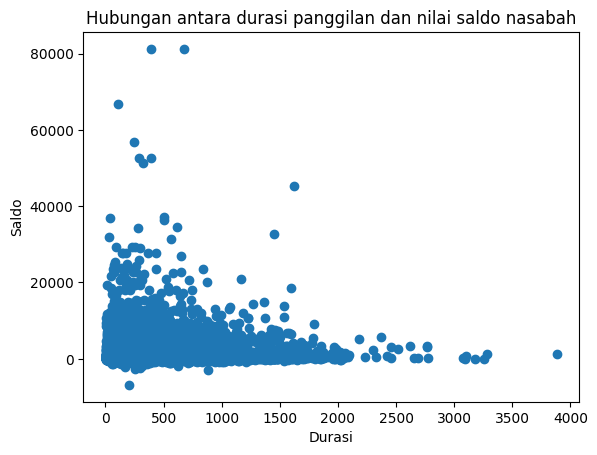

In [14]:
plt.scatter(df['duration'], df['balance'])
plt.xlabel('Durasi')
plt.ylabel('Saldo')
plt.title('Hubungan antara durasi panggilan dan nilai saldo nasabah')
plt.show()

<ipython-input-15-bda1a0304f9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

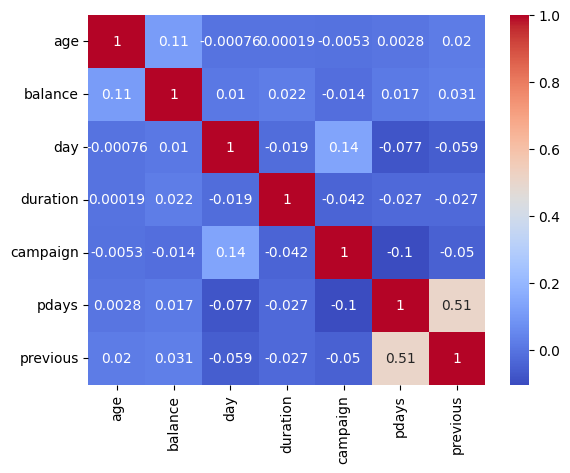

In [15]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Modelling

##### Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
# mengubah nilai-nilai dari kolom yang bertipe data object menjadi nilai numerik
for column in df:
  if df[column].dtypes == object:
    df[column] = le.fit_transform(df[column])

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


##### Preprocessing

In [19]:
from sklearn.model_selection import train_test_split

# mengekstrak fitur dari dataset dan menyimpannya dalam variabel X
X = df.drop(columns=['deposit'])

# mengekstrak target variabel (kelas yang ingin diprediksi) dari dataset dan menyimpannya dalam variabel y.
y = df['deposit']

# membagi data menjadi dua subset, yaitu data pelatihan dan data pengujian dengan proporsi 80:20. X dan y adalah data yang akan dibagi. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
from sklearn.preprocessing import StandardScaler
# Lakukan scaling pada data train
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
x_test_scaled = scaler.transform(X_test)

##### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# menginisialisasi untuk melatih data
gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)

# melakukan prediksi pada data pengujian 
y_pred = gnb.predict(x_test_scaled)

# menghitung matriks konfusi, akurasi, presisi, recall(sensitivitas), dan nilai F-1 dari model
cm_nb = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# mencetak nilai akurasi, presisi, recall, dan F1-score dari model.
print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 74.65%
Precision: 70.42%
Recall: 80.97%
F1-score: 75.33%


#### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model
knn.fit(x_train_scaled, y_train)

# Memprediksi label pada data uji
y_pred = knn.predict(x_test_scaled)

cm_knn = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menghitung akurasi
print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-score: {:.2f}%".format(f1*100))


Accuracy: 77.34%
Precision: 78.77%
Recall: 71.98%
F1-score: 75.22%


#### C4.5

In [23]:
class Node:
    def __init__(self):
        
        # tautan ke sub node kiri dan kanan
        self.right = None
        self.left = None
        
        # dihasilkan dari kriteria pemisahan
        self.column = None
        self.threshold = None
        
        # probabilitas untuk objek di dalam Node untuk termasuk ke masing-masing kelas yang diberikan
        self.probas = None
        # kedalaman node yang diberikan
        self.depth = None
        
        # jika ini adalah Root Node atau tidak
        self.is_terminal = False

In [24]:
# menginisialisasi parameter
class DecisionTreeClassifier:
    def __init__(self, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2):
        
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        
        self.classes = None
        
        # Decision tree
        self.Tree = None
    
    # menghitung nilai probabilitas kelas di dalam node
    def nodeProbas(self, y):
        '''
        Calculates probability of class in a given node
        '''
        
        probas = []
        
        # menghitung probabilitas dari tiap label unik
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    # Menghitung kriteria Gini
    def gini(self, probas):
        '''
        Calculates gini criterion
        '''
        
        return 1 - np.sum(probas**2)
    
    # menghitung probabilitas label dan kemudian akan menghitung impuritas Gini untuk menentukan seberapa bercampurnya label yang ada di dalam sebuah node
    def calcImpurity(self, y):
        '''
        Wrapper for the impurity calculation. Calculates probas first and then passses them
        to the Gini criterion
        '''
        
        return self.gini(self.nodeProbas(y))
    
    # mencari pemisah terbaik dalam tiap node
    def calcBestSplit(self, X, y):
        '''
        Calculates the best possible split for the concrete node of the tree
        '''
        
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        
        impurityBefore = self.calcImpurity(y)
        
        # untuk tiap kolom di X
        for col in range(X.shape[1]):
            x_col = X[:, col]
            
            # untuk tiap nilai di kolom
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
                    
                #  menghitung impuritas untuk node kanan dan kiri
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)
                
                # menghitung informasi dari Gain
                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                
                # mencari tahu apakah InfoGain lebih baik dari yang lain
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
                    
        
        # jika belum menemukan pemisah
        if bestInfoGain == -999:
            return None, None, None, None, None, None
        
        # membuat pemisah yang terbaik
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]
        
        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right
                
                
                
    # membuat decision tres seceara rekursif dari atas ke bawah
    def buildDT(self, X, y, node):
        '''
        Recursively builds decision tree from the top to bottom
        '''
        
        # mengecek kondisi terminal, menghentikan pembentukan tree pada suatu titik yang dianggap sudah optimal sehingga tidak perlu melakukan splitting(pemisahan) lagi
        
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        
        # menghitung sisa pemisahan
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        
        if splitCol is None:
            node.is_terminal = True
            
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        
        node.column = splitCol
        node.threshold = thresh
        
        # membuat sub node kiri dan kanan
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        
        # pemisahan secara rekursif
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)
        
        
        
        
    # melatih model pada decision tree
    def fit(self, X, y):
        '''
        Standard fit function to run all the model training
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
        
        self.classes = np.unique(y)
        # membuat node root 
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        
        self.buildDT(X, y, self.Tree)
    
    # memprediksi probabilitas objek yang diberikan untuk setiap kelas pada satu titik dalam decision tree
    def predictSample(self, x, node):
        '''
        Passes one object through decision tree and return the probability of it to belong to each class
        '''
       
    
        # if we have reached the terminal node of the tree
        if node.is_terminal:
            return node.probas
        
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)
            
        return probas
        
        
    
    def predict(self, X):
        '''
        Returns the labels for each X
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)
        
        return np.asarray(predictions)

In [25]:
# definisikan model Decission Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split=2)

# latih model Decission Tree Classifier
dtc.fit(x_train_scaled, y_train)

# evalusasi performa model menggunakan data uji
dtc_pred = dtc.predict(x_test_scaled)

#### Evaluation

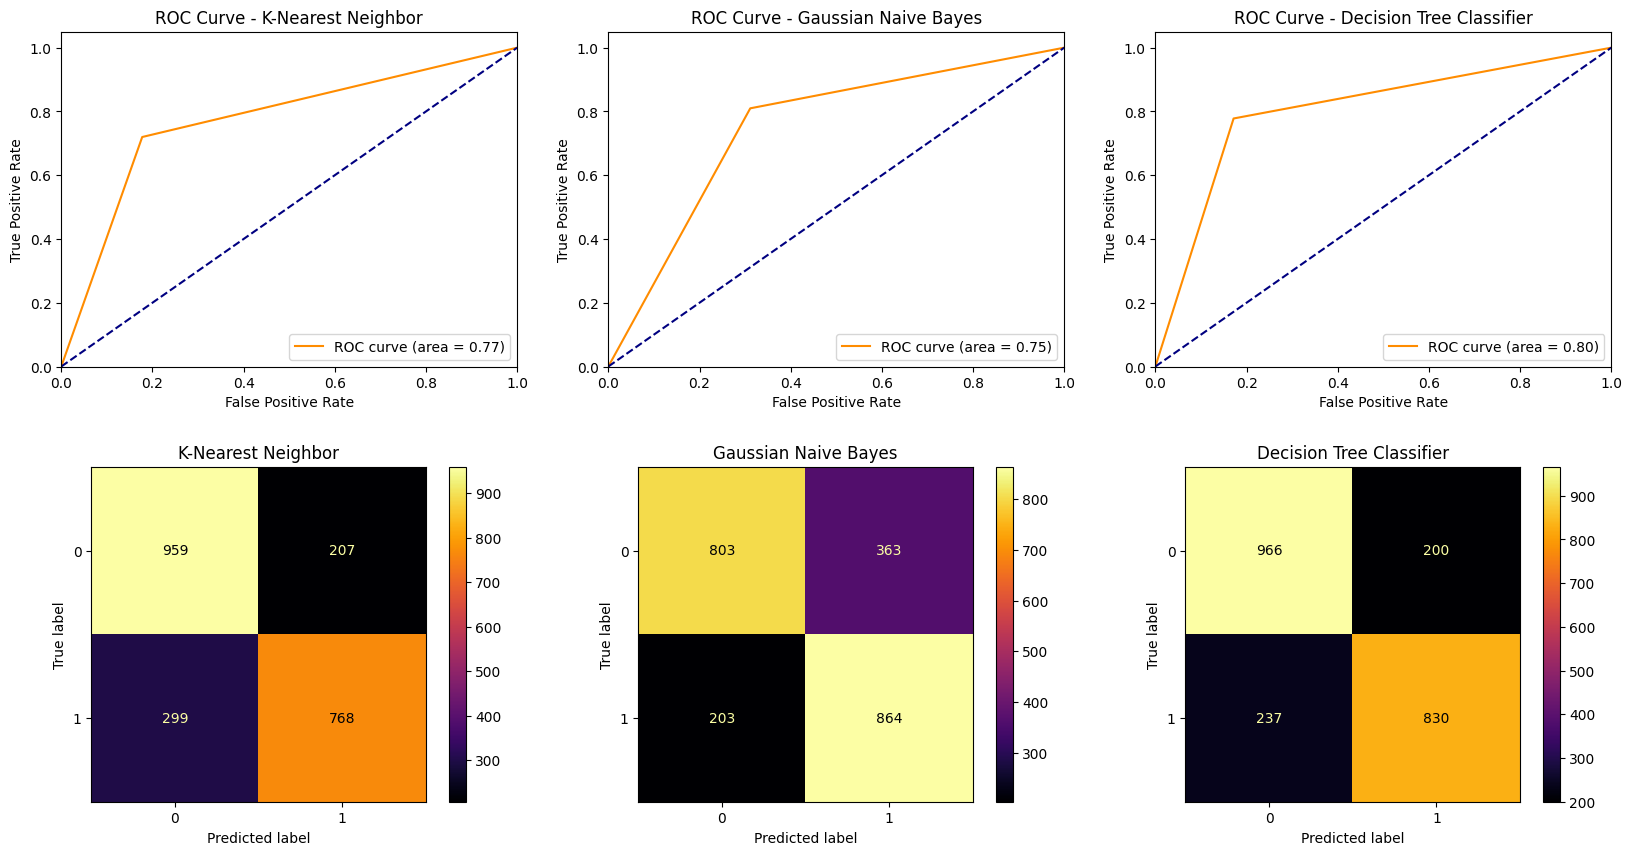

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%)
K-Nearest Neighbor,77.339901,78.769231,71.977507,77.112253
Gaussian Naive Bayes,74.652933,70.415648,80.974695,74.921310
Decision Tree Classifier,80.429915,80.582524,77.788191,80.317766


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test_scaled)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung precision dan recall
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: blue' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

## Deployment

In [27]:
df.to_csv('deployment-supervised.csv')

# CRISP-DM (Unsupervised Learning)

Pima Indians Diabetes Database

Dataset Unsupervised Learning with Diabetes Dataset berisi informasi mengenai pasien diabetes. Dataset ini terdiri dari 9 kolom dan 768 baris data, dengan masing-masing kolom memiliki informasi sebagai berikut:

Pregnancies: jumlah kehamilan yang pernah dialami oleh pasien
Glucose: kadar glukosa plasma puasa pasien dalam mg/dL
Blood Pressure: tekanan darah pasien dalam mm Hg
Skin Thickness: ketebalan lipatan kulit trisep pasien dalam mm
Insulin: jumlah insulin serum pasien dalam mu U/mL
BMI: indeks massa tubuh pasien (kg/m^2)
Diabetes Pedigree Function: mengukur tingkat keturunan diabetes pada pasien berdasarkan riwayat keluarga
Age: usia pasien dalam tahun
Outcome: variabel target, apakah pasien terkena diabetes (1) atau tidak (0)

## Data Understanding

In [28]:
# Import libraries
# Digunakan untuk memanipulasi dan memproses data dalam bentuk DataFrame
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Collect Data

In [29]:
# Membaca file csv dari url yang diberikan dan menyimpannya dalam variabel df
df = pd.read_csv('https://raw.githubusercontent.com/indrabna/PA_DM/main/diabetes.csv')

### Describe Data

In [30]:
# Menggunakan metode info() pada dataframe df untuk menampilkan informasi terkait struktur dan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preparation

In [31]:
# Menggunakan method .isna() untuk mengecek data yang bernilai null atau tidak
# Kemudian menggunakan method .sum() untuk menjumlahkan nilai null pada setiap kolom dataframe 'df'
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
# Kode ini digunakan untuk mengecek apakah ada baris data yang duplikat pada DataFrame df.
# Jika ada, maka baris tersebut akan diambil dan ditampilkan pada output.
# Fungsi duplicated() digunakan untuk mencari baris data yang duplikat.
# Kemudian, hasilnya akan dijadikan sebagai parameter pada operator indexing [] yang digunakan untuk menampilkan baris duplikat.
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [34]:
# Menampilkan seluruh isi dari dataframe df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
# Memilih kolom yang hanya bertipe data numerik
cols = df.select_dtypes(include=['float64', 'int64'])

# List untuk menyimpan hasil perhitungan outlier dari setiap kolom numerik
results = []
# Perulangan untuk menghitung outlier pada setiap kolom numerik
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
# Menghitung lower bound dan upper bound untuk outlier detection dengan IQR
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
# Menghitung jumlah outlier pada kolom yang bersangkutan
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
# Menambahkan hasil perhitungan ke dalam list results
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Membuat dataframe dari list hasil perhitungan
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Menampilkan dataframe hasil perhitungan outlier
display(results_df)

Kolom,Persentase Outliers
Pregnancies,0.520833
Glucose,0.651042
BloodPressure,5.859375
SkinThickness,0.130208
Insulin,4.427083
BMI,2.473958
DiabetesPedigreeFunction,3.776042
Age,1.171875
Outcome,0.000000


In [36]:
# Memilih kolom yang hanya bertipe data numerik
cols = df.select_dtypes(include=['float64', 'int64'])

# List untuk menyimpan hasil perhitungan outlier dari setiap kolom numerik
results = []
# Perulangan untuk menghitung outlier pada setiap kolom numerik
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
# Menghitung lower bound dan upper bound untuk outlier detection dengan IQR
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
# Menghitung jumlah outlier pada kolom yang bersangkutan
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
# Jika persentase outlier kurang dari 5% dan lebih besar dari 0%, maka baris yang terdeteksi sebagai outlier pada kolom tersebut akan dihapus dari DataFrame df.
    if percent_outliers < 5 and percent_outliers > 0:
      df = df[~((df[col] > upper_bound) | (df[col] < lower_bound))]
# Mencari kembali baris pada kolom col yang memiliki nilai di luar batas bawah dan atas (outlier) setelah dilakukan penghapusan pada langkah sebelumnya.
    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
# Menghitung persentase dari jumlah baris yang terdeteksi sebagai outlier terhadap total baris pada dataset setelah dilakukan penghapusan.    
    percent_outliers_after = (len(outliers_after)/len(df))*100
# Menambahkan hasil deteksi outlier dan penghapusan pada DataFrame results dalam bentuk dictionary yang berisi nama kolom dan persentase outlier setelah dilakukan penghapusan.
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers_after})

# Membuat dataframe dari list hasil perhitungan
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Menampilkan dataframe hasil perhitungan outlier
display(results_df)

Kolom,Persentase Outliers
Pregnancies,0.000000
Glucose,0.000000
BloodPressure,5.928854
SkinThickness,0.000000
Insulin,0.000000
BMI,0.000000
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


In [37]:
# Menghapus kolom 'Outcome' dari dataframe 'df2' dengan menggunakan method 'drop' pada axis 1.
df=df.drop('Outcome',axis=1)

In [38]:
# Menampilkan informasi mengenai struktur dan tipe data dari suatu DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               664 non-null    int64  
 1   Glucose                   664 non-null    int64  
 2   BloodPressure             664 non-null    int64  
 3   SkinThickness             664 non-null    int64  
 4   Insulin                   664 non-null    int64  
 5   BMI                       664 non-null    float64
 6   DiabetesPedigreeFunction  664 non-null    float64
 7   Age                       664 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 46.7 KB


### Visualisasi

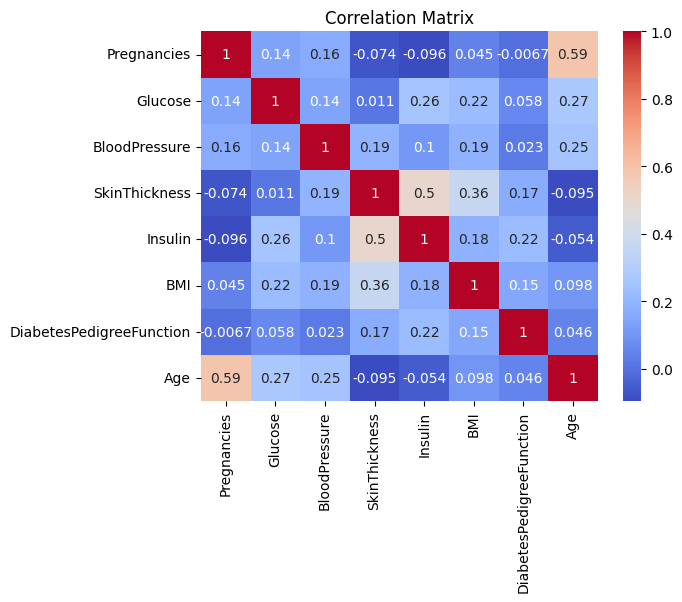

In [39]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

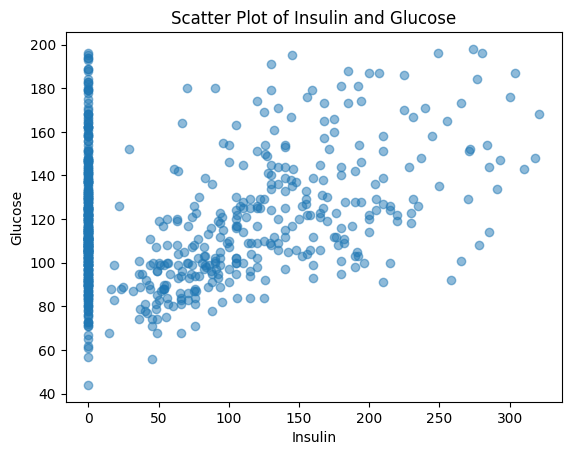

In [40]:
import matplotlib.pyplot as plt

# Mengambil kolom Insulin dan Glucose dari dataset
insulin = df['Insulin']
glucose = df['Glucose']

# Membuat scatter plot dengan Insulin di sumbu x dan Glucose di sumbu y
plt.scatter(insulin, glucose, alpha=0.5)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Insulin')
plt.ylabel('Glucose')

# Menambahkan judul pada plot
plt.title('Scatter Plot of Insulin and Glucose')

# Menampilkan plot
plt.show()


## Modelling

In [41]:
# Memanggil library KMeans dan StandardScaler yang digunakan untuk melakukan clustering dan preprocessing data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Mengimport library time untuk mengukur waktu eksekusi
import time

In [42]:
# Membuat variabel train yang berisi dataset df yang telah diubah menjadi format one-hot encoding
# Hal ini diperlukan untuk mengubah variabel kategorikal menjadi numerikal, sehingga bisa digunakan pada model machine learning
train = pd.get_dummies(df)

In [43]:
# Melakukan standarisasi pada data train menggunakan StandardScaler
# StandardScaler akan mengubah setiap fitur sehingga memiliki rata-rata nol dan standar deviasi satu
scaler = StandardScaler()
# Hasilnya akan disimpan pada variabel scaled_data
scaled_data = scaler.fit_transform(train)
# fit_transform() digunakan untuk menghitung mean dan variance dari data, kemudian mengubah data menjadi skala yang telah ditentukan

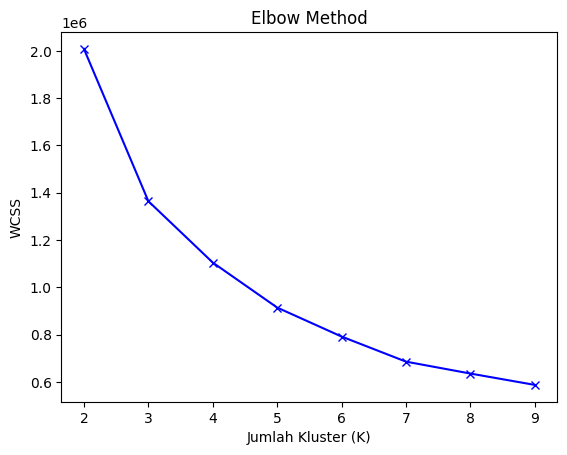

In [44]:
# Mengimport library matplotlib untuk membuat plot
import matplotlib.pyplot as plt

# Mengimport librarynwarnings untuk menonaktifkan warning
import warnings
warnings.filterwarnings("ignore")
# Inisialisasi list kosong untuk menampung hasil dari tiap nilai K
elbow_scores = []
# Range nilai K yang akan diuji
k_range = range(2, 10)
# Perulangan untuk mencari nilai inertia pada tiap K
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)
    elbow_scores.append(kmeans.inertia_)

# Membuat plot menggunakan matplotlib
plt.plot(k_range, elbow_scores,"bx-")
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [45]:
import numpy as np # Mengimport library NumPy dengan nama alias np
class kmeans:
    """The k-means algorithm.""" # Membuat sebuah class kmeans untuk mengimplementasikan algoritma k-means

    def __init__(self, n_clusters): # Menginisialisasi variabel-variabel yang dibutuhkan untuk algoritma k-means
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()
        
    def train(self, df, verbose): # Method untuk melakukan pelatihan model k-means pada data yang diberikan
        self.verbose = verbose
        self.data = df.copy(deep=True) # Menyalin data frame pada variabel df ke dalam variabel self.data
        self.clusters = np.zeros(len(self.data))

        # Memeriksa apakah ada kolom bernama 'species' dalam data frame, dan menghapusnya jika ada
        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Menginisialisasi centroid secara acak
        unique_rows = self.data.drop_duplicates() # Mengambil baris-baris unik pada data frame
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters) # Menentukan titik-titik awal centroid secara acak dari baris-baris unik yang dipilih dengan jumlah n_clusters
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nSentroid yang dimulai secara acak:")
            print(self.centroids)

        # Menginisialisasi centroid lama dengan matrix berisi nol.
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Bandingkan setiap titik data dalam himpunan data dengan masing-masing k-means dan tetapkan setiap titik ke kluster terdekat
        while not self.old_centroids.equals(self.centroids): # Melakukan iterasi hingga centroid baru dan centroid lama sama
            
            if self.verbose:
                time.sleep(3)

            # Simpan centroid lama
            self.old_centroids = self.centroids.copy(deep=True)

            for row_i in range(0, len(self.data)): # Mengiterasi setiap baris pada data frame
                distances = list() # Membuat list kosong untuk menampung jarak antara titik data dan centroid
                point = self.data.iloc[row_i] # Memilih baris data pada indeks row_i

                # Hitung jarak antara titik saat ini dan masing-masing centroid
                for row_c in range(0, len(self.centroids)): # Mengiterasi setiap centroid
                    centroid = self.centroids.iloc[row_c] # Memilih centroid pada indeks row_c
                    distances.append(np.linalg.norm(point - centroid)) # Menambahkan jarak antara titik data dan centroid ke dalam list distances

                # Menetapkan titik data ke kluster
                self.clusters[row_i] = np.argmin(distances) # Menentukan klaster untuk titik data pada indeks row_i berdasarkan jarak terpendek

            # Untuk setiap cluster, ekstrak nilai yang sekarang menjadi milik setiap cluster dan hitung k-mean baru
            for cls in range(0, self.n_clusters): # Mengiterasi setiap klaster

                # Menentukan indeks baris yang terdapat pada klaster cls
                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0: # Menentukan centroid baru jika tidak ada titik data pada klaster tersebut
                    self.centroids.loc[cls] = self.old_centroids.loc[cls] # Menetapkan centroid baru dengan centroid lama
                else:
                    # Menetapkan centroid baru dengan rata-rata dari titik data pada klaster tersebut
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean() 
                
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [46]:
# Menginisialisasi model KMeans dengan number_of_clusters sebanyak 3, kemudian melakukan training dengan memanggil fungsi train dari objek kmeans dengan parameter input train dan verbose yang di set sebagai False 
# Pada fungsi train, KMeans akan dilatih pada data train yang sudah diolah dan hasil akhirnya akan disimpan pada atribut clusters, centroids, dan predictions dari objek KMeans
number_of_clusters = 3
kmeans = kmeans(n_clusters=number_of_clusters)
kmeans.train(df=train, verbose=False)

In [47]:
# Menambahkan kolom cluster ke dalam data train yang berisi label cluster yang diperoleh dari algoritma k-means 
# Kemudian, centroid dari setiap cluster dihitung dan ditambahkan ke dalam centroids. Akhirnya, data train dan centroids digabungkan menjadi satu dataframe all_df
train['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
all_df = pd.concat([train, centroids])

In [48]:
# Membagi data train menjadi tiga kluster berdasarkan hasil clustering yang telah dilakukan sebelumnya dengan algoritma k-means
cluster1 = train[train['cluster'] == 0]
cluster2 = train[train['cluster'] == 1]
cluster3 = train[train['cluster'] == 2]

In [49]:
# Mengimpor library Plotly Express dengan alias px. 
# Library ini menyediakan cara yang mudah dan cepat untuk membuat grafik dengan banyak fitur tambahan seperti tooltip interaktif, animasi, dan visualisasi 3D
import plotly.express as px

 0   Pregnancies               664 non-null    int64  
 1   Glucose                   664 non-null    int64  
 2   BloodPressure             664 non-null    int64  
 3   SkinThickness             664 non-null    int64  
 4   Insulin                   664 non-null    int64  
 5   BMI                       664 non-null    float64
 6   DiabetesPedigreeFunction  664 non-null    float64
 7   Age 

In [50]:
px.scatter_3d(all_df, x='Age', y='Insulin', z='SkinThickness', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

# px.scatter_3d adalah fungsi dari library Plotly Express yang digunakan untuk membuat plot 3D
# Pada kode di atas, fungsi ini digunakan untuk membuat scatter plot 3D dari data all_df dengan sumbu x diwakili oleh kolom 'Age', sumbu y diwakili oleh kolom 'Insulin', dan sumbu z diwakili oleh kolom 'SkinThickness'
# Setiap data point pada plot diwarnai berdasarkan cluster dengan menggunakan warna yang berbeda-beda dan skala warna yang telah ditentukan dengan argumen color dan color_continuous_scale.

## Evaluation

In [51]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(train.drop('cluster', axis=1), kmeans.clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Tampilkan dataframe sebagai tabel tanpa kolom indeks
display(df_scores.style.hide_index())

Metric,Score
Silhouette Score,0.441676
Calinski-Harabasz Score,945.203225
Davies-Bouldin Score,0.802294


## Deployment

In [52]:
train.to_csv('deployment-unsupervised.csv')